f(x): x*cos(3*x)
f'(x): -3*x*sin(3*x) + cos(3*x)
f''(x): -9*x*cos(3*x) - 6*sin(3*x)


Results Summary (Bounded Methods)

Method                    x_min        f(x_min)      Iterations
----------------------------------------------------------------------
Conjugate Gradient          1.1419         -1.0961               3
Newton-CG                1.1419         -1.0961               4
BFGS                     1.1419         -1.0961               5
L-BFGS-B                 1.1419         -1.0961               5
Truncated Newton          1.1419         -1.0961               3
SLSQP                    1.1419         -1.0961               4


Results Summary (Unbounded Methods)

Method                    x_min        f(x_min)      Iterations
----------------------------------------------------------------------
Analytical               1.1419         -1.0961               -
Gradient Descent          1.1419         -1.0961              19
Newton's                 1.1419         -1.0961      

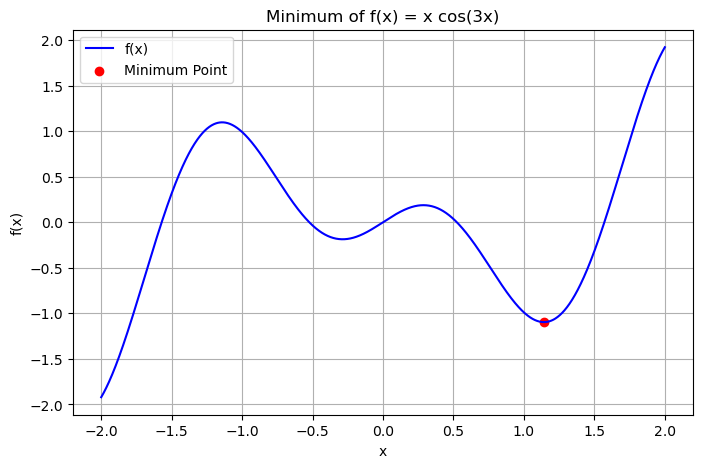

In [1]:
# ============================
# OPTIMISATION METHODS
# ============================

"""
Optimisation aims to determine the minimum or maximum of an objective
(or fitness) function, which assigns a scalar value to each candidate solution
within a defined decision space.

Common classes of optimisation methods include:
  - Analytical methods
  - Iterative (numerical) methods
  - Heuristic methods
  - Metaheuristic methods

Analytical methods locate stationary points exactly by solving f′(x) = 0 and are only
applicable when the objective function is explicit, differentiable, and
tractable symbolically.

Iterative methods converge towards an optimum through repeated updates.
Examples include:
  - Gradient Descent - this steps downhill using the local gradient and a learning
  rate controlling step size.
  - Newton–Raphson - this uses first and second derivatives for rapid local
  convergence but is sensitive to the initial guess.

Problem statement:
Determine the minimum of f(x) = x cos(3x) using both analytical and iterative
optimisation techniques.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
# root_scalar is used to locate roots of f'(x), corresponding to stationary points

from sympy import symbols, diff, cos, lambdify
# SymPy enables symbolic differentiation before conversion to numerical form

x = symbols('x')
# Define the symbolic variable

f = x * cos(3 * x)
# Define the objective function symbolically

print("f(x):", f)

f_dash = diff(f, x)
print("f'(x):", f_dash)

f_2_dash = diff(f_dash, x)
print("f''(x):", f_2_dash)

# Convert symbolic expressions into NumPy-compatible functions
# lambdify produces efficient numerical functions from symbolic definitions

f2 = lambdify(x, f, 'numpy')
df = lambdify(x, f_dash, 'numpy')
ddf = lambdify(x, f_2_dash, 'numpy')

# ============================
# ANALYTICAL METHOD
# ============================
# root_scalar identifies a root of f'(x) within a bracket where a sign change
# occurs, corresponding to a stationary point of f(x)

root = root_scalar(df, bracket=[0.5, 1.5])

x_an = root.root
# Extract numerical root from the solver object

f_an = f2(x_an)
# Evaluate the objective function at the stationary point

# ============================
# GRADIENT DESCENT METHOD
# ============================
x0_gd = 1.0
learning_rate = 0.05
tol = 1e-8
max_iter = 10000
gd_iterations = 0

for i in range(max_iter):
    f_dash_gd = df(x0_gd)
    x_gd = x0_gd - learning_rate * f_dash_gd

    if abs(x_gd - x0_gd) < tol:
        break

    x0_gd = x_gd
    gd_iterations += 1

f_gd = f2(x0_gd)
# Evaluate the minimum obtained via Gradient Descent

# ============================
# NEWTON–RAPHSON METHOD
# ============================
x0_nr = 1.0
tol = 1e-8
max_iter = 10000
nr_iterations = 0

for i in range(max_iter):
    step = df(x0_nr) / ddf(x0_nr)
    x_nr = x0_nr - step

    if abs(x_nr - x0_nr) < tol:
        break

    x0_nr = x_nr
    nr_iterations += 1

f_nr = f2(x0_nr)

print("\n")

# ============================
# SCIPY OPTIMISATION ROUTINES
# ============================
#
# SciPy provides highly optimised implementations of advanced optimisation
# algorithms, offering superior robustness and efficiency compared to manual
# implementations.

from scipy.optimize import minimize

def f(x):
    return x*np.cos(3*x)

def df(x):
    return np.cos(3*x) - 3*x*np.sin(3*x)

def ddf(x):
    return -6*np.sin(3*x) - 9*x*np.cos(3*x)

# Initial guess (must be a NumPy array for scipy.optimize.minimize)
x0 = np.array([1.0])

# ============================
# CONJUGATE GRADIENT (CG)
# ============================
result_cg = minimize(f, x0, method='CG', jac=df)

x_cg = result_cg.x[0]
f_cg = result_cg.fun
cg_iterations = result_cg.nit

# ============================
# NEWTON-CG METHOD
# ============================
result_ncg = minimize(f, x0, method="Newton-CG", jac=df, hess=ddf)

x_ncg = result_ncg.x[0]
f_ncg = result_ncg.fun
ncg_iterations = result_ncg.nit

# ============================
# BFGS (QUASI-NEWTON) METHOD
# ============================
result_bfgs = minimize(f, x0, method="BFGS", jac=df)

x_bfgs = result_bfgs.x[0]
f_bfgs = result_bfgs.fun
bfgs_iterations = result_bfgs.nit

# ============================
# BOUNDED OPTIMISATION METHODS
# ============================
# These are the Truncated Newton (TNC) and Sequential Least Squares 
# Programming (SLSQP) methods
bounds = [(-4, 2)]

result_lbfgsb = minimize(f, x0, method="L-BFGS-B", jac=df, bounds=bounds)

x_lbfgsb = result_lbfgsb.x[0]
f_lbfgsb = result_lbfgsb.fun
lbfgsb_iterations = result_lbfgsb.nit

result_tnc = minimize(f, x0, method="TNC", jac=df)

x_tnc = result_tnc.x[0]
f_tnc = result_tnc.fun
tnc_iterations = result_tnc.nit

result_slsqp = minimize(f, x0, method="SLSQP", jac=df)

x_slsqp = result_slsqp.x[0]
f_slsqp = result_slsqp.fun
slsqp_iterations = result_slsqp.nit

# ============================
# RESULTS SUMMARY
# ============================
print("Results Summary (Bounded Methods)\n")
print("{:<15} {:>15} {:>15} {:>15}".format("Method", "x_min", "f(x_min)", "Iterations"))
print("-" * 70)
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Conjugate Gradient", x_cg, f_cg, cg_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Newton-CG", x_ncg, f_ncg, ncg_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("BFGS", x_bfgs, f_bfgs, bfgs_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("L-BFGS-B", x_lbfgsb, f_lbfgsb, lbfgsb_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Truncated Newton", x_tnc, f_tnc, tnc_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("SLSQP", x_slsqp, f_slsqp, slsqp_iterations))
print("\n")

print("Results Summary (Unbounded Methods)\n")
print("{:<15} {:>15} {:>15} {:>15}".format("Method", "x_min", "f(x_min)", "Iterations"))
print("-" * 70)
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Analytical", x_an, f_an, "-"))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Gradient Descent", x0_gd, f_gd, gd_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Newton's", x0_nr, f_nr, nr_iterations))
print("\n")

# ============================
# VISUALISATION
# ============================
x = np.linspace(-2, 2, 2000)

plt.figure(figsize=(8,5))
plt.plot(x, f2(x), color='blue', label="f(x)")
plt.scatter(x0_nr, f_nr, color='red', label="Minimum Point")
plt.title("Minimum of f(x) = x cos(3x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
"""
Using scipy.optimize.minimize for efficient numerical optimisation.

This code demonstrates several methods for finding the minimum of a scalar
function using built-in Python libraries, which are generally faster and more
robust than manually implementing gradient-based or Newton-Raphson methods.

As before, the objective function is:
    f(x) = x * cos(3x)
with its first and second derivatives defined as 'df' and 'ddf'.

Methods illustrated include:
    - Conjugate Gradient (CG) - an improvement on Gradient Descent that uses
      orthogonal directions for faster convergence.
    - Newton-CG - Newton’s method using both gradient and Hessian for robust
      convergence.
    - BFGS - a quasi-Newton method that approximates the Hessian.
    - L-BFGS-B - bounded BFGS method for constrained optimisation.
    - TNC - Truncated Newton method, supports approximations and bounds.
    - SLSQP - Sequential Least Squares Programming, suited for non-linear
      constrained problems.

For all methods, 'x0' defines the initial guess and 'jac=df' provides the
exact gradient to improve accuracy and efficiency.
"""

import numpy as np
from scipy.optimize import minimize

# Objective function and derivatives
def f(x):
    return x*np.cos(3*x)

def df(x):
    return np.cos(3*x) - 3*x*np.sin(3*x)

def ddf(x):
    return -6*np.sin(3*x) - 9*x*np.cos(3*x)

# Initial guess (as NumPy array since minimize expects vectors)
x0 = np.array([1.0])

# -------------------------
# Conjugate Gradient (CG)
# -------------------------
result_cg = minimize(f, x0, method='CG', jac=df)
x_cg = result_cg.x[0]       # Extract scalar result
f_cg = result_cg.fun         # Minimum value
cg_iterations = result_cg.nit # Number of iterations

# -------------------------
# Newton-CG
# -------------------------
result_ncg = minimize(f, x0, method="Newton-CG", jac=df, hess=ddf)
x_ncg = result_ncg.x[0]
f_ncg = result_ncg.fun
ncg_iterations = result_ncg.nit

# -------------------------
# BFGS (Quasi-Newton)
# -------------------------
result_bfgs = minimize(f, x0, method="BFGS", jac=df)
x_bfgs = result_bfgs.x[0]
f_bfgs = result_bfgs.fun
bfgs_iterations = result_bfgs.nit

# -------------------------
# L-BFGS-B (Bounded)
# -------------------------
bounds = [(-4, 2)]
result_lbfgsb = minimize(f, x0, method="L-BFGS-B", jac=df, bounds=bounds)
x_lbfgsb = result_lbfgsb.x[0]
f_lbfgsb = result_lbfgsb.fun
lbfgsb_iterations = result_lbfgsb.nit

# -------------------------
# Truncated Newton (TNC)
# -------------------------
result_tnc = minimize(f, x0, method="TNC", jac=df)
x_tnc = result_tnc.x[0]
f_tnc = result_tnc.fun
tnc_iterations = result_tnc.nit

# -------------------------
# Sequential Least Squares Programming (SLSQP)
# -------------------------
result_slsqp = minimize(f, x0, method="SLSQP", jac=df)
x_slsqp = result_slsqp.x[0]
f_slsqp = result_slsqp.fun
slsqp_iterations = result_slsqp.nit

# -------------------------
# Results Summary
# -------------------------
print("Results Summary\n")
print("{:<15} {:>15} {:>15} {:>15}".format("Method", "x_min", "f(x_min)", "Iterations"))
print("-" * 70)
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Conjugate Gradient", x_cg, f_cg, cg_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Newton-CG", x_ncg, f_ncg, ncg_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("BFGS", x_bfgs, f_bfgs, bfgs_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("L-BFGS-B", x_lbfgsb, f_lbfgsb, lbfgsb_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("Truncated Newton", x_tnc, f_tnc, tnc_iterations))
print("{:<15} {:>15.4f} {:>15.4f} {:>15}".format("SLSQP", x_slsqp, f_slsqp, slsqp_iterations))


Results Summary

Method                    x_min        f(x_min)      Iterations
----------------------------------------------------------------------
Conjugate Gradient          1.1419         -1.0961               3
Newton-CG                1.1419         -1.0961               4
BFGS                     1.1419         -1.0961               5
L-BFGS-B                 1.1419         -1.0961               5
Truncated Newton          1.1419         -1.0961               3
SLSQP                    1.1419         -1.0961               4
